In [15]:
#Homework2,3(belief propagtion and state evolution)
import numpy as np
import scipy.stats as stats
import math
from numpy import linalg as LA
#import matplotlib.pyplot as plt

n = 20 #dimension
m = 100 #data
mean1 = -10*np.ones(n)/np.sqrt(n)#s_0 = [10,...,10]
mean2 = 10*np.ones(n)/np.sqrt(n)
mean = np.zeros(n)
cov = np.identity(n)
x=np.zeros((m,n))
for i in range(m):
    if random.uniform(0,1)>0.5:
        x[i]=np.random.multivariate_normal(mean1, cov)+np.random.multivariate_normal(mean, cov)
    else:
        x[i]=np.random.multivariate_normal(mean2, cov)+np.random.multivariate_normal(mean, cov)
    
#print(x)
#print(np.mean(x),np.var(x))
chi = np.ones((m,n))
s = np.ones((m,n))
p = np.ones((m,n))
W = np.ones(m)
alpha = m/n
lamb = 3

def update_p_W_2(x,chi,s):
    for u in range(m):
        sum_W = 0
        for i in range(n):
            x_ = np.append(x[u][0:i],x[u][i+1:n])
            s_ = np.append(s[u][0:i],s[u][i+1:n])
            p[u][i] = x_@s_/np.sqrt(n)
            sum_W += x[u][i]**2*chi[u][i]/n
        W[u] = sum_W
    return p,W

def y_s(p,t):
    eps = 0.0001
    y_st = 1
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps:
            flag = False
            return y_new
            break
        y_st = y_new

def F(p,t):
    return y_s(p,t)/(np.sqrt(t))

def T(p,t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_chi_s_2(x,p,W):
    for i in range(n):
        t = np.zeros(m)
        f = np.zeros(m)
        xx = np.zeros(m)
        for j in range(m):
            t[j] = T(p[j][i],W[j])
            f[j] = F(p[j][i],W[j])
            xx[j] = x[j][i]**2
        for u in range(m):
            x_u = np.append(xx[0:u],xx[u+1:m])
            t_u = np.append(t[0:u],t[u+1:m])
            f_u = np.append(f[0:u],f[u+1:m])
            chi[u][i] = 1/(alpha + lamb - x_u@t_u/n)
            s[u][i] = chi[u][i]*np.sqrt(x_u)@f_u/np.sqrt(n)
    return chi,s


#testing
eps = 0.001
iter_ = 0

while iter_ <20:
    p_d = update_p_W_2(x,chi,s)[0]
    W_d = update_p_W_2(x,chi,s)[1]
    chi_d = update_chi_s_2(x,p_d,W_d)[0]
    s_d = update_chi_s_2(x,p_d,W_d)[1]

    chi = chi_d
    s = s_d
    print(s[0])
    iter_ += 1
print(chi_d)

[-0.62712608 -0.11228234 -0.91543317 -0.25475541 -1.50461259 -0.03995024
 -0.47138869 -0.7321193  -0.41260022 -1.03982026 -1.00004811 -0.35519123
 -0.87309451 -0.77805753 -0.29196654 -0.52136358 -1.23039359 -0.27316746
 -0.74398955 -1.55214331]
[0.6270915  0.11221119 0.91551062 0.25467135 1.50539479 0.03983655
 0.47132964 0.73213161 0.41250204 1.03995872 1.00015644 0.35514253
 0.87311136 0.77816027 0.29187755 0.52131721 1.23105922 0.27304861
 0.74396785 1.55305328]
[-0.62709152 -0.11221125 -0.91551052 -0.25467141 -1.50539452 -0.03983664
 -0.47132967 -0.73213157 -0.41250211 -1.03995861 -1.00015635 -0.35514257
 -0.8731113  -0.77816016 -0.29187762 -0.52131721 -1.23105933 -0.2730487
 -0.74396783 -1.55305295]
[0.62709152 0.11221126 0.91551052 0.25467142 1.50539449 0.03983664
 0.47132967 0.73213157 0.41250212 1.0399586  1.00015634 0.35514258
 0.87311131 0.77816016 0.29187763 0.52131721 1.23105932 0.2730487
 0.74396784 1.55305294]
[-0.62709152 -0.11221125 -0.91551052 -0.25467141 -1.50539452 -

In [23]:
#Belief propagation algorithm Eqs.27 - first version
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

chi = np.ones((m,n))
s = np.zeros((m,n))
p = np.zeros((m,n))
W = np.ones(m)
s_d = np.ones((m,n))
n = 100 #dimension
m = 300 #data
alpha = m/n
lamb = 3
mean1 = -10*np.ones(n)/np.sqrt(n)#s_0 = [20,...,20]
mean2 = 10*np.ones(n)/np.sqrt(n)
mean = np.zeros(n)
cov = np.identity(n)
x=np.zeros((m,n))
for i in range(m):
    if random.uniform(0,1)>0.5:
        x[i]=np.random.multivariate_normal(mean1, cov)+np.random.multivariate_normal(mean, cov)
    else:
        x[i]=np.random.multivariate_normal(mean2, cov)+np.random.multivariate_normal(mean, cov)
        

def update_p_W_2(x,chi,s):
    for u in range(m):
        sum_W = 0
        for i in range(n):
            x_ = np.append(x[u][0:i],x[u][i+1:n])
            s_ = np.append(s[u][0:i],s[u][i+1:n])
            p[u][i] = x_@s_/np.sqrt(n)
            sum_W += x[u][i]**2*chi[u][i]/n
        W[u] = sum_W
    return p,W

def y_s(p,t):
    eps = 0.0001
    y_st = 1
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps:
            flag = False
            return y_new
            break
        y_st = y_new

def F(p,t):
    return y_s(p,t)/(np.sqrt(t))

def T(p,t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_chi_s_2(x,p,W):
    for i in range(n):
        t = np.zeros(m)
        f = np.zeros(m)
        x_2 = np.zeros(m)
        for j in range(m):
            t[j] = T(p[j][i],W[j])
            f[j] = F(p[j][i],W[j])
            x_2[j] = x[j][i]**2
        for u in range(m):
            x_u = np.append(x_2[0:u],x_2[u+1:m])
            t_u = np.append(t[0:u],t[u+1:m])
            f_u = np.append(f[0:u],f[u+1:m])
            chi[u][i] = 1/(alpha + lamb - x_u@t_u/n)
            s[u][i] = chi[u][i]*np.sqrt(x_u)@f_u/np.sqrt(n)
    return chi,s

eps = 0.0001
iter_ = 0
para_old = np.array([0,0])
para_new = np.array([1,1])
while LA.norm(para_old-para_new)>eps and iter_<50:
    para_old = np.array([chi[0][0],s[0][0]])
    p_d = update_p_W_2(x,chi,s)[0]
    W_d = update_p_W_2(x,chi,s)[1]
    chi_d = update_chi_s_2(x,p_d,W_d)[0]
    s_d = update_chi_s_2(x,p_d,W_d)[1]
    para_new = np.array([chi_d[0][0],s_d[0][0]])
    chi = chi_d
    s = s_d
    #print(s_d,iter_)
    iter_ += 1
print(chi_d,s_d,iter_)

[[0.16667551 0.16667234 0.1666747  ... 0.16667341 0.16667935 0.16667389]
 [0.16667551 0.16667234 0.1666747  ... 0.16667341 0.16667934 0.16667389]
 [0.16667551 0.16667234 0.1666747  ... 0.16667341 0.16667934 0.16667389]
 ...
 [0.16667551 0.16667234 0.16667466 ... 0.16667341 0.1666793  0.16667389]
 [0.16667551 0.16667234 0.1666747  ... 0.1666734  0.16667934 0.16667389]
 [0.16667551 0.16667234 0.1666747  ... 0.16667341 0.16667934 0.16667389]] [[0.72092727 0.39272308 0.72097984 ... 0.5892022  1.06788194 0.55694005]
 [0.69487654 0.40449186 0.67250497 ... 0.62008415 1.10025005 0.57031579]
 [0.69790854 0.41879079 0.66569601 ... 0.59899506 1.07234308 0.56820622]
 ...
 [0.66667178 0.38081431 0.61730871 ... 0.57887624 1.0230584  0.53779633]
 [0.68788649 0.41773239 0.67062857 ... 0.62592025 1.07596375 0.54961539]
 [0.7155811  0.40392583 0.68270356 ... 0.60622328 1.09338866 0.60654386]] 3


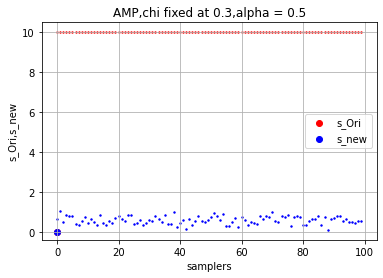

In [62]:
#Homework5(AMP second version fixed chi)
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

n = 100 #dimension
m = 20 #data
mean1 = -10*np.ones(n)/np.sqrt(n)#s_0 = [10,...,10]
mean2 = 10*np.ones(n)/np.sqrt(n)
mean = np.zeros(n)
cov = np.identity(n)
x=np.zeros((m,n))
for i in range(m):
    if random.uniform(0,1)>0.5:
        x[i]=np.random.multivariate_normal(mean1, cov)+np.random.multivariate_normal(mean, cov)
    else:
        x[i]=np.random.multivariate_normal(mean2, cov)+np.random.multivariate_normal(mean, cov)
        
chi = 0.3
s_0 = np.zeros(n)
p_0 = np.zeros(m)

alpha = m/n
lamb = 3

def update_p(x,s,p):
    p_d =np.zeros(m)
    for u in range(m):
        p_d[u]= x[u]@s/np.sqrt(n) - chi*F(p[u],chi)
    return p_d

def y_s(p,t):
    eps = 0.001
    y_st = 1
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps:
            flag = False
            return y_new
            break
        y_st = y_new

def F(p,t):
    return y_s(p,t)/(np.sqrt(t))

def T(p,t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_s(x,s,p):
    s_d = np.zeros(n)
    for i in range(n):
        for j in range(m):
            s_d[i] += chi*(x[j][i]*F(p[j],chi)/np.sqrt(n) - s[i]*x[j][i]**2*T(p[j],chi)/n)
    return s_d
       
#testing
eps = 0.01
iter_ = 0
p_new = np.zeros(m)
s_new = np.ones(n)
while iter_<10:
    p_new = update_p(x,s_0,p_0)
    s_new = update_s(x,s_0,p_new)
    s_0 = s_new
    p_0 = p_new
    #print("iterations:",iter_,"results:",s_new)
    iter_ += 1

s_Ori = 10*np.ones(n)
for i in range(n):
    plt.scatter(i,s_Ori[i],c = "r",s = 2)
    plt.scatter(i,s_new[i],c = "b",s = 2)
plt.scatter(0,0,c="r",label="s_Ori")
plt.scatter(0,0,c="b",label="s_new")
plt.title("AMP,chi fixed at 0.3,alpha = 0.5")
plt.ylabel("s_Ori,s_new")
plt.xlabel("samplers")
plt.grid()
plt.legend()
plt.show()

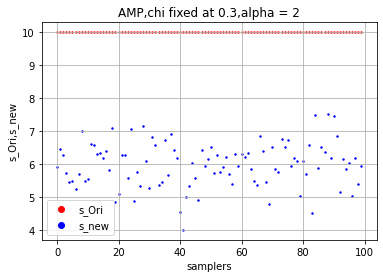

In [63]:
#Homework5(AMP second version fixed chi)
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

n = 100 #dimension
m = 200 #data
mean1 = -10*np.ones(n)/np.sqrt(n)#s_0 = [10,...,10]
mean2 = 10*np.ones(n)/np.sqrt(n)
mean = np.zeros(n)
cov = np.identity(n)
x=np.zeros((m,n))
for i in range(m):
    if random.uniform(0,1)>0.5:
        x[i]=np.random.multivariate_normal(mean1, cov)+np.random.multivariate_normal(mean, cov)
    else:
        x[i]=np.random.multivariate_normal(mean2, cov)+np.random.multivariate_normal(mean, cov)
        
chi = 0.3
s_0 = np.zeros(n)
p_0 = np.zeros(m)

alpha = m/n
lamb = 3

def update_p(x,s,p):
    p_d =np.zeros(m)
    for u in range(m):
        p_d[u]= x[u]@s/np.sqrt(n) - chi*F(p[u],chi)
    return p_d

def y_s(p,t):
    eps = 0.001
    y_st = 1
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps:
            flag = False
            return y_new
            break
        y_st = y_new

def F(p,t):
    return y_s(p,t)/(np.sqrt(t))

def T(p,t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_s(x,s,p):
    s_d = np.zeros(n)
    for i in range(n):
        for j in range(m):
            s_d[i] += chi*(x[j][i]*F(p[j],chi)/np.sqrt(n) - s[i]*x[j][i]**2*T(p[j],chi)/n)
    return s_d
       
#testing
eps = 0.01
iter_ = 0
p_new = np.zeros(m)
s_new = np.ones(n)
while iter_<10:
    p_new = update_p(x,s_0,p_0)
    s_new = update_s(x,s_0,p_new)
    s_0 = s_new
    p_0 = p_new
    #print("iterations:",iter_,"results:",s_new)
    iter_ += 1

s_Ori = 10*np.ones(n)
for i in range(n):
    plt.scatter(i,s_Ori[i],c = "r",s = 2)
    plt.scatter(i,s_new[i],c = "b",s = 2)
plt.scatter(0,0,c="r",label="s_Ori")
plt.scatter(0,0,c="b",label="s_new")
plt.title("AMP,chi fixed at 0.3,alpha = 2")
plt.ylabel("s_Ori,s_new")
plt.xlabel("samplers")
plt.grid()
plt.legend()
plt.show()

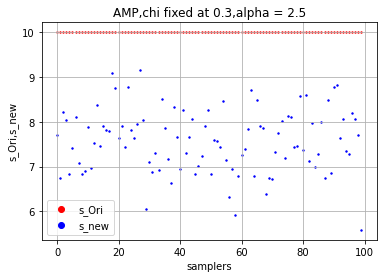

In [67]:
#Homework5(AMP second version fixed chi)
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

n = 100 #dimension
m = 250 #data
mean1 = -10*np.ones(n)/np.sqrt(n)#s_0 = [10,...,10]
mean2 = 10*np.ones(n)/np.sqrt(n)
mean = np.zeros(n)
cov = np.identity(n)
x=np.zeros((m,n))
for i in range(m):
    if random.uniform(0,1)>0.5:
        x[i]=np.random.multivariate_normal(mean1, cov)+np.random.multivariate_normal(mean, cov)
    else:
        x[i]=np.random.multivariate_normal(mean2, cov)+np.random.multivariate_normal(mean, cov)
        
chi = 0.3
s_0 = np.zeros(n)
p_0 = np.zeros(m)

alpha = m/n
lamb = 3

def update_p(x,s,p):
    p_d =np.zeros(m)
    for u in range(m):
        p_d[u]= x[u]@s/np.sqrt(n) - chi*F(p[u],chi)
    return p_d

def y_s(p,t):
    eps = 0.001
    y_st = 1
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps:
            flag = False
            return y_new
            break
        y_st = y_new

def F(p,t):
    return y_s(p,t)/(np.sqrt(t))

def T(p,t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_s(x,s,p):
    s_d = np.zeros(n)
    for i in range(n):
        for j in range(m):
            s_d[i] += chi*(x[j][i]*F(p[j],chi)/np.sqrt(n) - s[i]*x[j][i]**2*T(p[j],chi)/n)
    return s_d
       
#testing
eps = 0.01
iter_ = 0
p_new = np.zeros(m)
s_new = np.ones(n)
while iter_<10:
    p_new = update_p(x,s_0,p_0)
    s_new = update_s(x,s_0,p_new)
    s_0 = s_new
    p_0 = p_new
    #print("iterations:",iter_,"results:",s_new)
    iter_ += 1

s_Ori = 10*np.ones(n)
for i in range(n):
    plt.scatter(i,s_Ori[i],c = "r",s = 2)
    plt.scatter(i,s_new[i],c = "b",s = 2)
plt.scatter(0,0,c="r",label="s_Ori")
plt.scatter(0,0,c="b",label="s_new")
plt.title("AMP,chi fixed at 0.3,alpha = 2.5")
plt.ylabel("s_Ori,s_new")
plt.xlabel("samplers")
plt.grid()
plt.legend()
plt.show()

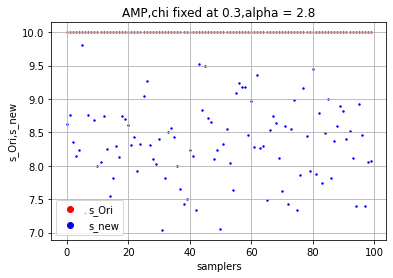

In [72]:
#Homework5(AMP second version fixed chi)
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

n = 100 #dimension
m = 280 #data
mean1 = -10*np.ones(n)/np.sqrt(n)#s_0 = [10,...,10]
mean2 = 10*np.ones(n)/np.sqrt(n)
mean = np.zeros(n)
cov = np.identity(n)
x=np.zeros((m,n))
for i in range(m):
    if random.uniform(0,1)>0.5:
        x[i]=np.random.multivariate_normal(mean1, cov)+np.random.multivariate_normal(mean, cov)
    else:
        x[i]=np.random.multivariate_normal(mean2, cov)+np.random.multivariate_normal(mean, cov)
        
chi = 0.3
s_0 = np.zeros(n)
p_0 = np.zeros(m)

alpha = m/n
lamb = 3

def update_p(x,s,p):
    p_d =np.zeros(m)
    for u in range(m):
        p_d[u]= x[u]@s/np.sqrt(n) - chi*F(p[u],chi)
    return p_d

def y_s(p,t):
    eps = 0.001
    y_st = 1
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps:
            flag = False
            return y_new
            break
        y_st = y_new

def F(p,t):
    return y_s(p,t)/(np.sqrt(t))

def T(p,t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_s(x,s,p):
    s_d = np.zeros(n)
    for i in range(n):
        for j in range(m):
            s_d[i] += chi*(x[j][i]*F(p[j],chi)/np.sqrt(n) - s[i]*x[j][i]**2*T(p[j],chi)/n)
    return s_d
       
#testing
eps = 0.01
iter_ = 0
p_new = np.zeros(m)
s_new = np.ones(n)
while iter_<10:
    p_new = update_p(x,s_0,p_0)
    s_new = update_s(x,s_0,p_new)
    s_0 = s_new
    p_0 = p_new
    #print("iterations:",iter_,"results:",s_new)
    iter_ += 1

s_Ori = 10*np.ones(n)
for i in range(n):
    plt.scatter(i,s_Ori[i],c = "r",s = 2)
    plt.scatter(i,s_new[i],c = "b",s = 2)
plt.scatter(0,0,c="r",label="s_Ori")
plt.scatter(0,0,c="b",label="s_new")
plt.title("AMP,chi fixed at 0.3,alpha = 2.8")
plt.ylabel("s_Ori,s_new")
plt.xlabel("samplers")
plt.grid()
plt.legend()
plt.show()

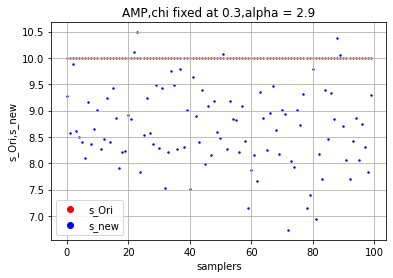

In [76]:
#Homework5(AMP second version fixed chi)
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

n = 100 #dimension
m = 290 #data
mean1 = -10*np.ones(n)/np.sqrt(n)#s_0 = [10,...,10]
mean2 = 10*np.ones(n)/np.sqrt(n)
mean = np.zeros(n)
cov = np.identity(n)
x=np.zeros((m,n))
for i in range(m):
    if random.uniform(0,1)>0.5:
        x[i]=np.random.multivariate_normal(mean1, cov)+np.random.multivariate_normal(mean, cov)
    else:
        x[i]=np.random.multivariate_normal(mean2, cov)+np.random.multivariate_normal(mean, cov)
        
chi = 0.3
s_0 = np.zeros(n)
p_0 = np.zeros(m)

alpha = m/n
lamb = 3

def update_p(x,s,p):
    p_d =np.zeros(m)
    for u in range(m):
        p_d[u]= x[u]@s/np.sqrt(n) - chi*F(p[u],chi)
    return p_d

def y_s(p,t):
    eps = 0.001
    y_st = 1
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps:
            flag = False
            return y_new
            break
        y_st = y_new

def F(p,t):
    return y_s(p,t)/(np.sqrt(t))

def T(p,t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_s(x,s,p):
    s_d = np.zeros(n)
    for i in range(n):
        for j in range(m):
            s_d[i] += chi*(x[j][i]*F(p[j],chi)/np.sqrt(n) - s[i]*x[j][i]**2*T(p[j],chi)/n)
    return s_d
       
#testing
eps = 0.01
iter_ = 0
p_new = np.zeros(m)
s_new = np.ones(n)
while iter_<10:
    p_new = update_p(x,s_0,p_0)
    s_new = update_s(x,s_0,p_new)
    s_0 = s_new
    p_0 = p_new
    #print("iterations:",iter_,"results:",s_new)
    iter_ += 1

s_Ori = 10*np.ones(n)
for i in range(n):
    plt.scatter(i,s_Ori[i],c = "r",s = 2)
    plt.scatter(i,s_new[i],c = "b",s = 2)
plt.scatter(0,0,c="r",label="s_Ori")
plt.scatter(0,0,c="b",label="s_new")
plt.title("AMP,chi fixed at 0.3,alpha = 2.9")
plt.ylabel("s_Ori,s_new")
plt.xlabel("samplers")
plt.grid()
plt.legend()
plt.show()

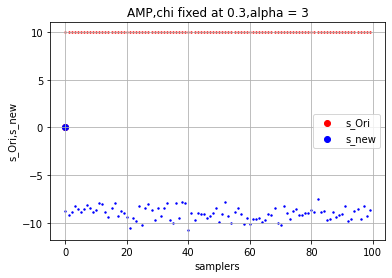

In [75]:
#Homework5(AMP second version fixed chi)
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

n = 100 #dimension
m = 300 #data
mean1 = -10*np.ones(n)/np.sqrt(n)#s_0 = [10,...,10]
mean2 = 10*np.ones(n)/np.sqrt(n)
mean = np.zeros(n)
cov = np.identity(n)
x=np.zeros((m,n))
for i in range(m):
    if random.uniform(0,1)>0.5:
        x[i]=np.random.multivariate_normal(mean1, cov)+np.random.multivariate_normal(mean, cov)
    else:
        x[i]=np.random.multivariate_normal(mean2, cov)+np.random.multivariate_normal(mean, cov)
        
chi = 0.3
s_0 = np.zeros(n)
p_0 = np.zeros(m)

alpha = m/n
lamb = 3

def update_p(x,s,p):
    p_d =np.zeros(m)
    for u in range(m):
        p_d[u]= x[u]@s/np.sqrt(n) - chi*F(p[u],chi)
    return p_d

def y_s(p,t):
    eps = 0.001
    y_st = 1
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps:
            flag = False
            return y_new
            break
        y_st = y_new

def F(p,t):
    return y_s(p,t)/(np.sqrt(t))

def T(p,t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_s(x,s,p):
    s_d = np.zeros(n)
    for i in range(n):
        for j in range(m):
            s_d[i] += chi*(x[j][i]*F(p[j],chi)/np.sqrt(n) - s[i]*x[j][i]**2*T(p[j],chi)/n)
    return s_d
       
#testing
eps = 0.01
iter_ = 0
p_new = np.zeros(m)
s_new = np.ones(n)
while iter_<10:
    p_new = update_p(x,s_0,p_0)
    s_new = update_s(x,s_0,p_new)
    s_0 = s_new
    p_0 = p_new
    #print("iterations:",iter_,"results:",s_new)
    iter_ += 1

s_Ori = 10*np.ones(n)
for i in range(n):
    plt.scatter(i,s_Ori[i],c = "r",s = 2)
    plt.scatter(i,s_new[i],c = "b",s = 2)
plt.scatter(0,0,c="r",label="s_Ori")
plt.scatter(0,0,c="b",label="s_new")
plt.title("AMP,chi fixed at 0.3,alpha = 3")
plt.ylabel("s_Ori,s_new")
plt.xlabel("samplers")
plt.grid()
plt.legend()
plt.show()

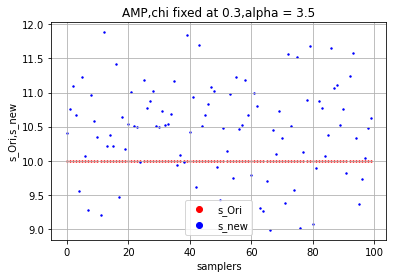

In [74]:
#Homework5(AMP second version fixed chi)
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

n = 100 #dimension
m = 350 #data
mean1 = -10*np.ones(n)/np.sqrt(n)#s_0 = [10,...,10]
mean2 = 10*np.ones(n)/np.sqrt(n)
mean = np.zeros(n)
cov = np.identity(n)
x=np.zeros((m,n))
for i in range(m):
    if random.uniform(0,1)>0.5:
        x[i]=np.random.multivariate_normal(mean1, cov)+np.random.multivariate_normal(mean, cov)
    else:
        x[i]=np.random.multivariate_normal(mean2, cov)+np.random.multivariate_normal(mean, cov)
        
chi = 0.3
s_0 = np.zeros(n)
p_0 = np.zeros(m)

alpha = m/n
lamb = 3

def update_p(x,s,p):
    p_d =np.zeros(m)
    for u in range(m):
        p_d[u]= x[u]@s/np.sqrt(n) - chi*F(p[u],chi)
    return p_d

def y_s(p,t):
    eps = 0.001
    y_st = 1
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps:
            flag = False
            return y_new
            break
        y_st = y_new

def F(p,t):
    return y_s(p,t)/(np.sqrt(t))

def T(p,t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_s(x,s,p):
    s_d = np.zeros(n)
    for i in range(n):
        for j in range(m):
            s_d[i] += chi*(x[j][i]*F(p[j],chi)/np.sqrt(n) - s[i]*x[j][i]**2*T(p[j],chi)/n)
    return s_d
       
#testing
eps = 0.01
iter_ = 0
p_new = np.zeros(m)
s_new = np.ones(n)
while iter_<10:
    p_new = update_p(x,s_0,p_0)
    s_new = update_s(x,s_0,p_new)
    s_0 = s_new
    p_0 = p_new
    #print("iterations:",iter_,"results:",s_new)
    iter_ += 1

s_Ori = 10*np.ones(n)
for i in range(n):
    plt.scatter(i,s_Ori[i],c = "r",s = 2)
    plt.scatter(i,s_new[i],c = "b",s = 2)
plt.scatter(0,0,c="r",label="s_Ori")
plt.scatter(0,0,c="b",label="s_new")
plt.title("AMP,chi fixed at 0.3,alpha = 3.5")
plt.ylabel("s_Ori,s_new")
plt.xlabel("samplers")
plt.grid()
plt.legend()
plt.show()

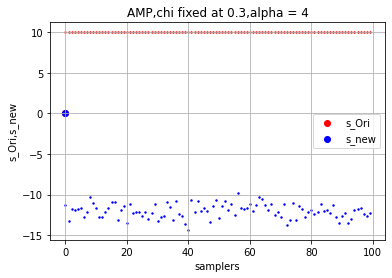

In [64]:
#Homework5(AMP second version fixed chi)
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

n = 100 #dimension
m = 400 #data
mean1 = -10*np.ones(n)/np.sqrt(n)#s_0 = [10,...,10]
mean2 = 10*np.ones(n)/np.sqrt(n)
mean = np.zeros(n)
cov = np.identity(n)
x=np.zeros((m,n))
for i in range(m):
    if random.uniform(0,1)>0.5:
        x[i]=np.random.multivariate_normal(mean1, cov)+np.random.multivariate_normal(mean, cov)
    else:
        x[i]=np.random.multivariate_normal(mean2, cov)+np.random.multivariate_normal(mean, cov)
        
chi = 0.3
s_0 = np.zeros(n)
p_0 = np.zeros(m)

alpha = m/n
lamb = 3

def update_p(x,s,p):
    p_d =np.zeros(m)
    for u in range(m):
        p_d[u]= x[u]@s/np.sqrt(n) - chi*F(p[u],chi)
    return p_d

def y_s(p,t):
    eps = 0.001
    y_st = 1
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps:
            flag = False
            return y_new
            break
        y_st = y_new

def F(p,t):
    return y_s(p,t)/(np.sqrt(t))

def T(p,t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_s(x,s,p):
    s_d = np.zeros(n)
    for i in range(n):
        for j in range(m):
            s_d[i] += chi*(x[j][i]*F(p[j],chi)/np.sqrt(n) - s[i]*x[j][i]**2*T(p[j],chi)/n)
    return s_d
       
#testing
eps = 0.01
iter_ = 0
p_new = np.zeros(m)
s_new = np.ones(n)
while iter_<10:
    p_new = update_p(x,s_0,p_0)
    s_new = update_s(x,s_0,p_new)
    s_0 = s_new
    p_0 = p_new
    #print("iterations:",iter_,"results:",s_new)
    iter_ += 1

s_Ori = 10*np.ones(n)
for i in range(n):
    plt.scatter(i,s_Ori[i],c = "r",s = 2)
    plt.scatter(i,s_new[i],c = "b",s = 2)
plt.scatter(0,0,c="r",label="s_Ori")
plt.scatter(0,0,c="b",label="s_new")
plt.title("AMP,chi fixed at 0.3,alpha = 4")
plt.ylabel("s_Ori,s_new")
plt.xlabel("samplers")
plt.grid()
plt.legend()
plt.show()

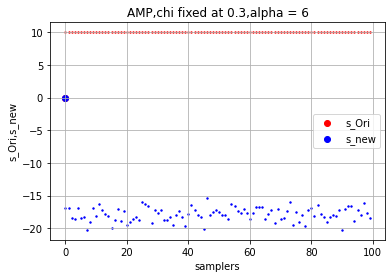

In [65]:
#Homework5(AMP second version fixed chi)
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

n = 100 #dimension
m = 600 #data
mean1 = -10*np.ones(n)/np.sqrt(n)#s_0 = [10,...,10]
mean2 = 10*np.ones(n)/np.sqrt(n)
mean = np.zeros(n)
cov = np.identity(n)
x=np.zeros((m,n))
for i in range(m):
    if random.uniform(0,1)>0.5:
        x[i]=np.random.multivariate_normal(mean1, cov)+np.random.multivariate_normal(mean, cov)
    else:
        x[i]=np.random.multivariate_normal(mean2, cov)+np.random.multivariate_normal(mean, cov)
        
chi = 0.3
s_0 = np.zeros(n)
p_0 = np.zeros(m)

alpha = m/n
lamb = 3

def update_p(x,s,p):
    p_d =np.zeros(m)
    for u in range(m):
        p_d[u]= x[u]@s/np.sqrt(n) - chi*F(p[u],chi)
    return p_d

def y_s(p,t):
    eps = 0.001
    y_st = 1
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps:
            flag = False
            return y_new
            break
        y_st = y_new

def F(p,t):
    return y_s(p,t)/(np.sqrt(t))

def T(p,t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def update_s(x,s,p):
    s_d = np.zeros(n)
    for i in range(n):
        for j in range(m):
            s_d[i] += chi*(x[j][i]*F(p[j],chi)/np.sqrt(n) - s[i]*x[j][i]**2*T(p[j],chi)/n)
    return s_d
       
#testing
eps = 0.01
iter_ = 0
p_new = np.zeros(m)
s_new = np.ones(n)
while iter_<10:
    p_new = update_p(x,s_0,p_0)
    s_new = update_s(x,s_0,p_new)
    s_0 = s_new
    p_0 = p_new
    #print("iterations:",iter_,"results:",s_new)
    iter_ += 1

s_Ori = 10*np.ones(n)
for i in range(n):
    plt.scatter(i,s_Ori[i],c = "r",s = 2)
    plt.scatter(i,s_new[i],c = "b",s = 2)
plt.scatter(0,0,c="r",label="s_Ori")
plt.scatter(0,0,c="b",label="s_new")
plt.title("AMP,chi fixed at 0.3,alpha = 6")
plt.ylabel("s_Ori,s_new")
plt.xlabel("samplers")
plt.grid()
plt.legend()
plt.show()